In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

Shape original RGB: (168, 300, 3)
Shape Grey: (168, 300)
Type: uint8


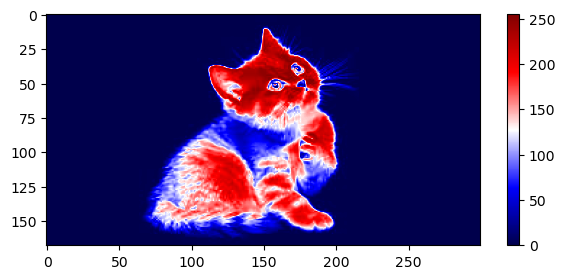

In [22]:
import cv2 # computer vision problems library

img = cv2.imread('cat.jpg')
print("Shape original RGB:",img.shape)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Shape Grey:",gray_img.shape)
print("Type:",gray_img.dtype)

def Plot_CWT_Small(array,min_color, max_color):
    plt.figure(1, figsize=(7,3))
    plt.imshow(array, cmap='seismic', aspect='auto',vmin=min_color, vmax=max_color)
    plt.colorbar()
    plt.show()

Plot_CWT_Small(gray_img,0,255)

Shape Grey: (168, 300)
(168, 300)


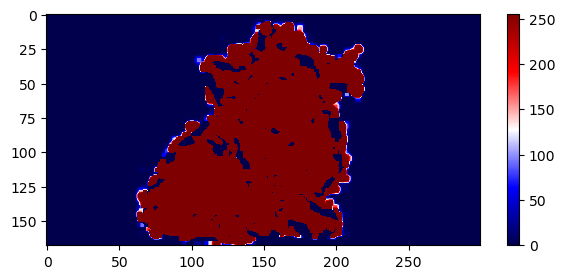

In [3]:
# Haris corner detection
gray_img_32 = np.float32(gray_img)
print("Shape Grey:",gray_img_32.shape)

dst = cv2.cornerHarris(gray_img_32, blockSize=4, ksize=5, k=0.04)
dst = cv2.dilate(dst, None) # dilate to mark the corners --> the oposite is "erode": https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
print(dst.shape)
Plot_CWT_Small(dst,0,255)

(168, 300)
uint8
float32
(10, 1, 2)
(168, 300, 3)


<ipython-input-4-492d20b8699d>:11: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img, (x, y), 6, (0, 255, 0), -1)


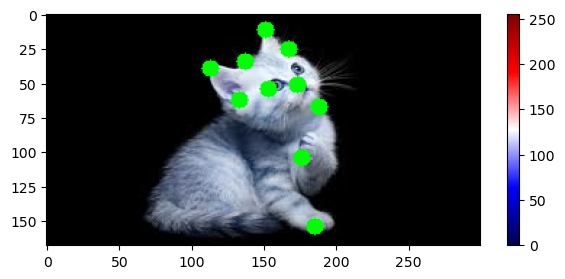

In [4]:
# Shi-Tomasi corner detection
print(gray_img.shape)
print(gray_img.dtype)
print(gray_img_32.dtype)

corners = cv2.goodFeaturesToTrack(gray_img_32, maxCorners=10, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)
print(corners.shape)
for item in corners:
    x, y = item[0]
    cv2.circle(img, (x, y), 6, (0, 255, 0), -1)
print(img.shape)
Plot_CWT_Small(img,0,255)

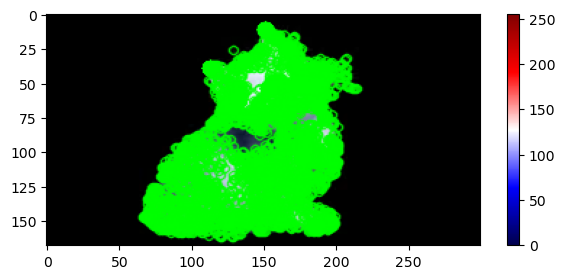

In [20]:
# FAST algorithm for corner detection

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))
Plot_CWT_Small(kp_img,0,255)

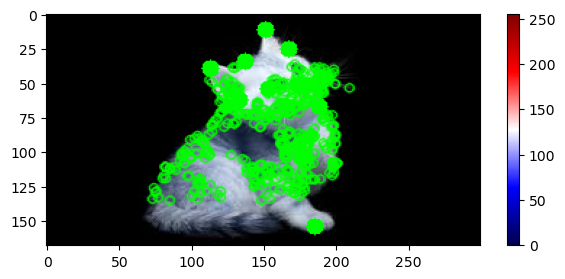

In [25]:
# ORB (Oriented FAST and Rotated Brief)

orb = cv2.ORB_create(nfeatures=1000)
kp, des = orb.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
Plot_CWT_Small(kp_img,0,255)

Shape original RGB: (168, 300, 3)
Shape Grey: (168, 300)


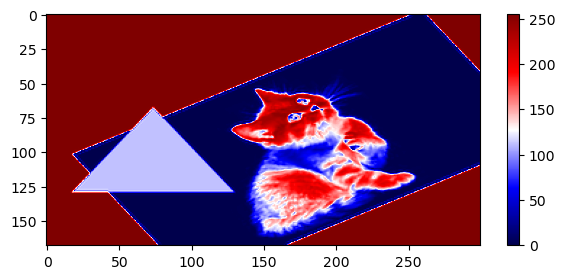

In [7]:
# Brute-Force (BF) Matcher

img = cv2.imread('cat2.jpg')
print("Shape original RGB:",img.shape)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Shape Grey:",gray_img.shape)
Plot_CWT_Small(gray_img,0,255)

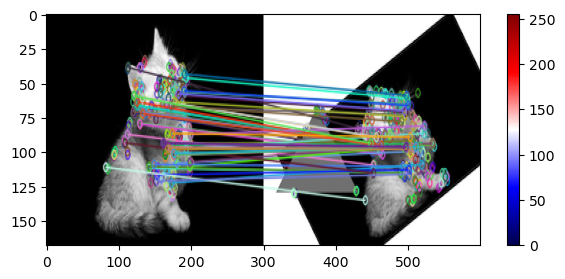

In [8]:
img1 = cv2.imread('cat.jpg', 0)
img2 = cv2.imread('cat2.jpg', 0)

orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

Plot_CWT_Small(match_img,0,255)